In [10]:
# --- Cell 1: 標題與簡介 ---

# 🏠 房屋價格探索性資料分析 (EDA)

**專案目標：** 對 Kaggle 房屋價格資料集進行完整探索性分析  
**資料來源：** [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  
**分析重點：** 了解資料分布、找出重要特徵、檢測資料問題、為特徵工程做準備

In [2]:
# --- Cell 2: 環境設定與套件載入 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 設定中文字型與樣式
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 設定圖表風格
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ 環境設定完成！")

✅ 環境設定完成！


In [3]:
# --- Cell 3: 資料載入與基本檢視 ---
# 載入資料
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

print("📊 資料集基本資訊:")
print(f"訓練集形狀: {train.shape}")
print(f"測試集形狀: {test.shape}")
print(f"目標變數: SalePrice")

print("\n🔍 訓練集前 3 筆資料:")
display(train.head(3))

print("\n📝 資料型態概況:")
train.info()

📊 資料集基本資訊:
訓練集形狀: (1460, 81)
測試集形狀: (1459, 80)
目標變數: SalePrice

🔍 訓練集前 3 筆資料:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500



📝 資料型態概況:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [4]:
# --- Cell 4: 基本統計量 ---
print("📈 數值特徵基本統計量:")
display(train.describe())

print("\n🏷️ 類別特徵數量:")
categorical_cols = train.select_dtypes(include=['object']).columns
print(f"類別特徵數量: {len(categorical_cols)}")
print("類別特徵範例:", list(categorical_cols[:5]))

📈 數值特徵基本統計量:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



🏷️ 類別特徵數量:
類別特徵數量: 43
類別特徵範例: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']


🎯 目標變數 SalePrice 詳細分析:
最小值: $34,900
最大值: $755,000
平均值: $180,921
中位數: $163,000
標準差: $79,443
偏態係數: 1.8829
峰態係數: 6.5363


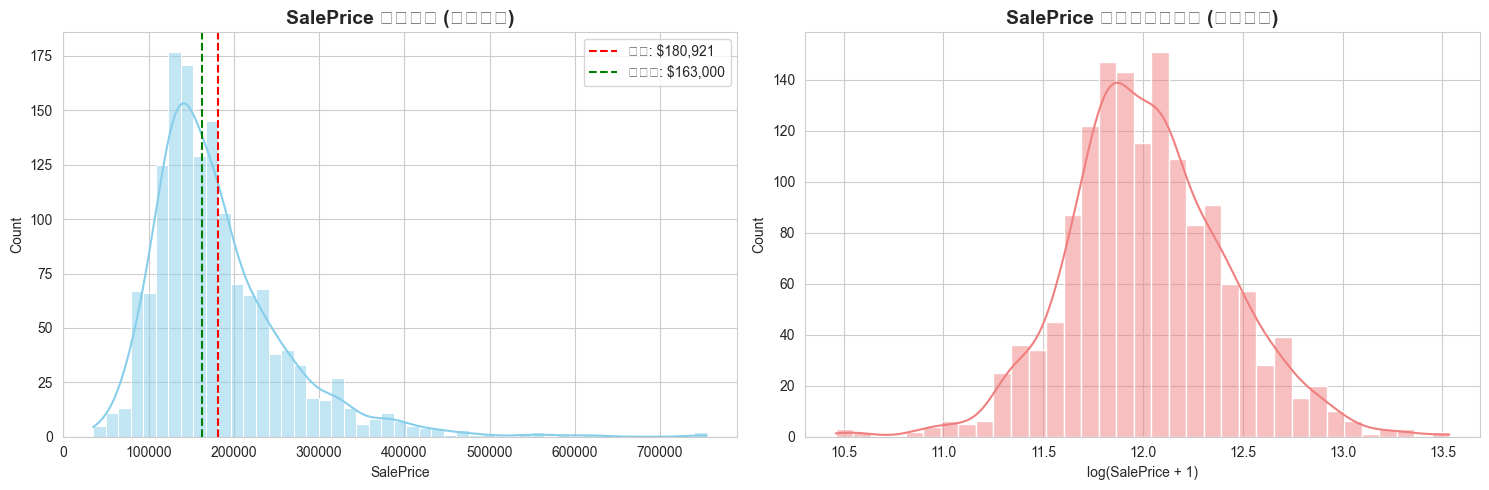


💡 結論: SalePrice 呈明顯右偏分布，建議進行對數轉換改善模型表現


In [5]:
# --- Cell 5: 目標變數分析 ---
print("🎯 目標變數 SalePrice 詳細分析:")

# 基本統計量
sp_stats = {
    '最小值': f"${train['SalePrice'].min():,}",
    '最大值': f"${train['SalePrice'].max():,}",
    '平均值': f"${train['SalePrice'].mean():,.0f}",
    '中位數': f"${train['SalePrice'].median():,.0f}",
    '標準差': f"${train['SalePrice'].std():,.0f}",
    '偏態係數': f"{train['SalePrice'].skew():.4f}",
    '峰態係數': f"{train['SalePrice'].kurt():.4f}"
}

for key, value in sp_stats.items():
    print(f"{key}: {value}")

# 視覺化分布
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 原始分布
sns.histplot(train['SalePrice'], kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(train['SalePrice'].mean(), color='red', linestyle='--', label=f'平均: ${train["SalePrice"].mean():,.0f}')
axes[0].axvline(train['SalePrice'].median(), color='green', linestyle='--', label=f'中位數: ${train["SalePrice"].median():,.0f}')
axes[0].set_title('SalePrice 原始分布 (嚴重右偏)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('SalePrice')
axes[0].legend()

# 對數轉換後分布
sns.histplot(np.log1p(train['SalePrice']), kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('SalePrice 對數轉換後分布 (接近常態)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('log(SalePrice + 1)')

plt.tight_layout()
plt.show()

print("\n💡 結論: SalePrice 呈明顯右偏分布，建議進行對數轉換改善模型表現")

🕳️ 缺失值分析報告
有缺失值的欄位數量: 19
總缺失值數量: 7829

📋 缺失最嚴重的15個欄位:


,缺失數量,缺失比例%
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55


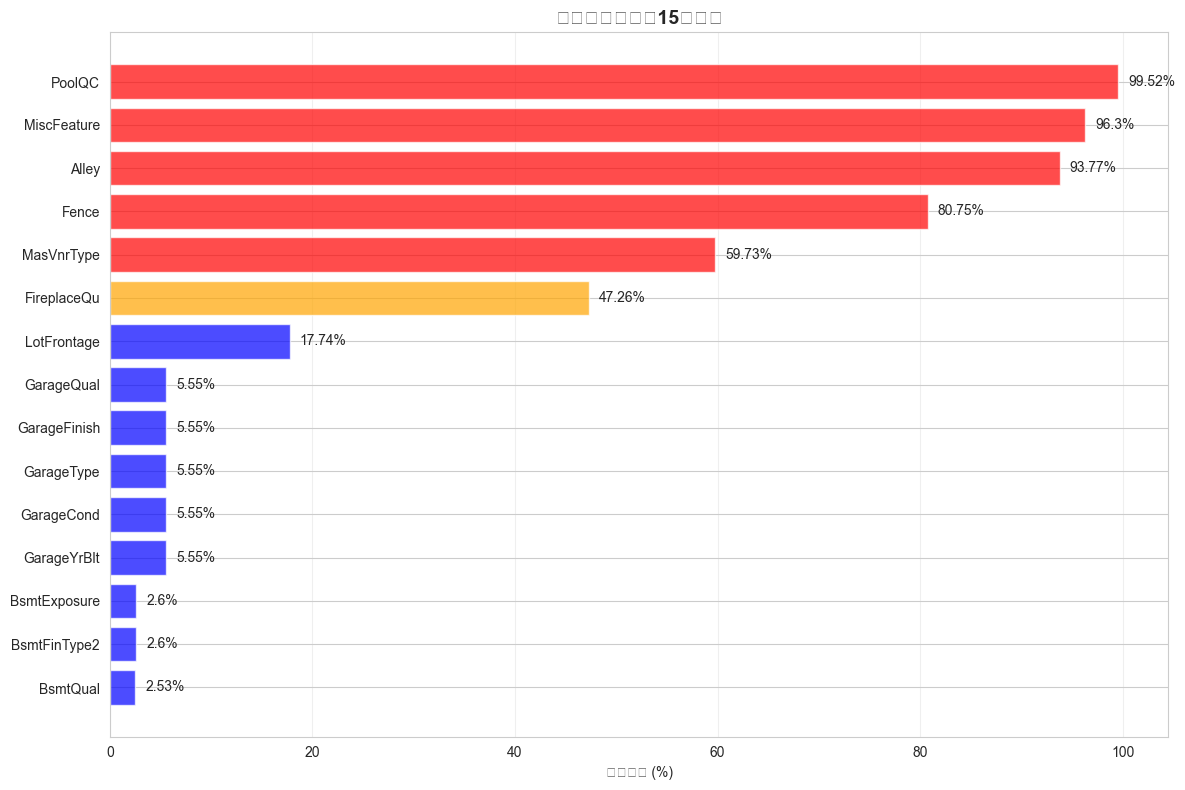


🚨 缺失值處理建議:
- 刪除缺失超過50%的欄位: 5 個
  • PoolQC: 99.52% 缺失
  • MiscFeature: 96.3% 缺失
  • Alley: 93.77% 缺失
  • Fence: 80.75% 缺失
  • MasVnrType: 59.73% 缺失


In [6]:
# --- Cell 6: 缺失值分析 ---
print("🕳️ 缺失值分析報告")

# 計算缺失值
missing = train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_pct = (missing / len(train)) * 100

missing_df = pd.DataFrame({
    '缺失數量': missing, 
    '缺失比例%': missing_pct.round(2)
})

print(f"有缺失值的欄位數量: {len(missing_df)}")
print(f"總缺失值數量: {train.isnull().sum().sum()}")

# 顯示缺失最嚴重的15個欄位
print("\n📋 缺失最嚴重的15個欄位:")
display(missing_df.head(15))

# 視覺化缺失值
plt.figure(figsize=(12, 8))
missing_plot_data = missing_df.head(15).sort_values('缺失比例%', ascending=True)
colors = ['red' if x > 50 else 'orange' if x > 20 else 'blue' for x in missing_plot_data['缺失比例%']]

plt.barh(missing_plot_data.index, missing_plot_data['缺失比例%'], color=colors, alpha=0.7)
plt.xlabel('缺失比例 (%)')
plt.title('缺失比例最高的15個欄位', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# 添加數值標籤
for i, v in enumerate(missing_plot_data['缺失比例%']):
    plt.text(v + 1, i, f'{v}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n🚨 缺失值處理建議:")
high_missing = missing_df[missing_df['缺失比例%'] > 50]
print(f"- 刪除缺失超過50%的欄位: {len(high_missing)} 個")
for col in high_missing.index:
    print(f"  • {col}: {high_missing.loc[col, '缺失比例%']}% 缺失")

📈 與房價相關性最高的數值特徵
🏆 與 SalePrice 最相關的 15 個特徵:


,特徵名稱,相關係數,相關強度
0,SalePrice,1.000000,極強
1,OverallQual,0.790982,極強
2,GrLivArea,0.708624,極強
3,GarageCars,0.640409,強
4,GarageArea,0.623431,強
5,TotalBsmtSF,0.613581,強
6,1stFlrSF,0.605852,強
7,FullBath,0.560664,強
8,TotRmsAbvGrd,0.533723,強
9,YearBuilt,0.522897,強


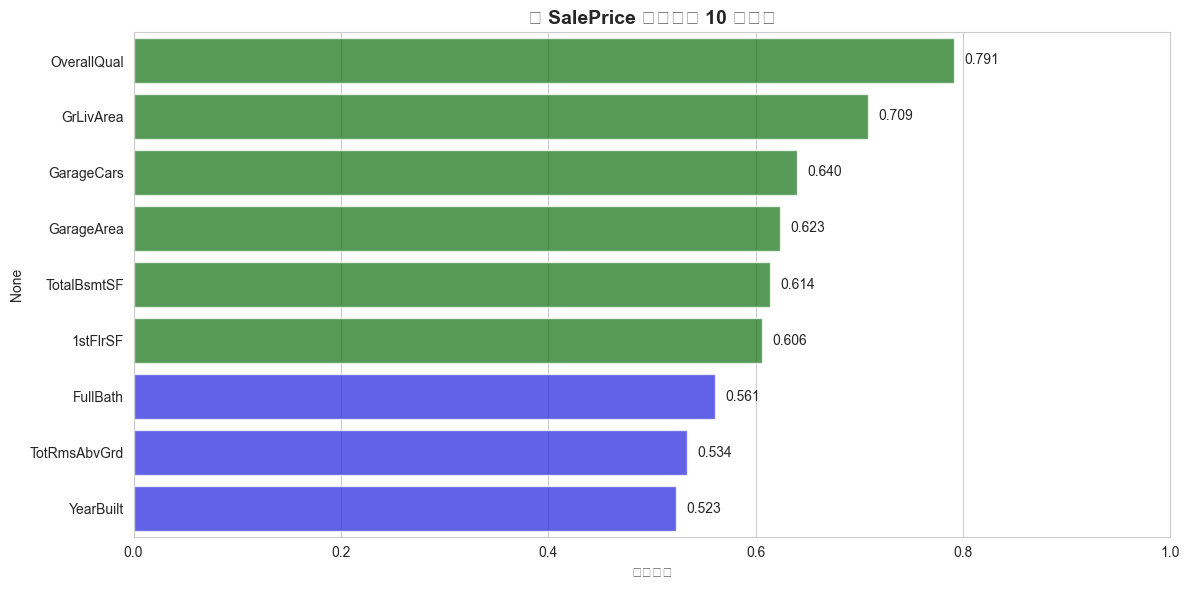

💡 關鍵發現:
- 最相關特徵: OverallQual (相關係數: 0.791)
- 強相關特徵 (>0.5): 11 個
- 弱相關特徵 (<0.1): 13 個


In [7]:
# --- Cell 7: 數值特徵相關性分析 ---
print("📈 與房價相關性最高的數值特徵")

# 計算與SalePrice的相關係數
corr_with_price = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

# 建立相關性表格
corr_df = pd.DataFrame({
    '特徵名稱': corr_with_price.head(15).index,
    '相關係數': corr_with_price.head(15).values,
    '相關強度': ['極強' if abs(x) > 0.7 else '強' if abs(x) > 0.5 else '中等' for x in corr_with_price.head(15).values]
})

print("🏆 與 SalePrice 最相關的 15 個特徵:")
display(corr_df)

# 可視化前10個最相關特徵
plt.figure(figsize=(12, 6))
top_corr = corr_with_price.head(10).iloc[1:]  # 排除SalePrice自己
colors = ['green' if x > 0.6 else 'blue' for x in top_corr.values]

sns.barplot(y=top_corr.index, x=top_corr.values, palette=colors, alpha=0.7)
plt.xlabel('相關係數')
plt.title('與 SalePrice 最相關的 10 個特徵', fontsize=14, fontweight='bold')
plt.xlim(0, 1)

# 添加數值標籤
for i, v in enumerate(top_corr.values):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("💡 關鍵發現:")
print(f"- 最相關特徵: {corr_with_price.index[1]} (相關係數: {corr_with_price.iloc[1]:.3f})")
print(f"- 強相關特徵 (>0.5): {len(corr_with_price[corr_with_price > 0.5])} 個")
print(f"- 弱相關特徵 (<0.1): {len(corr_with_price[corr_with_price < 0.1])} 個")

🔍 重要特徵與房價關係深度分析


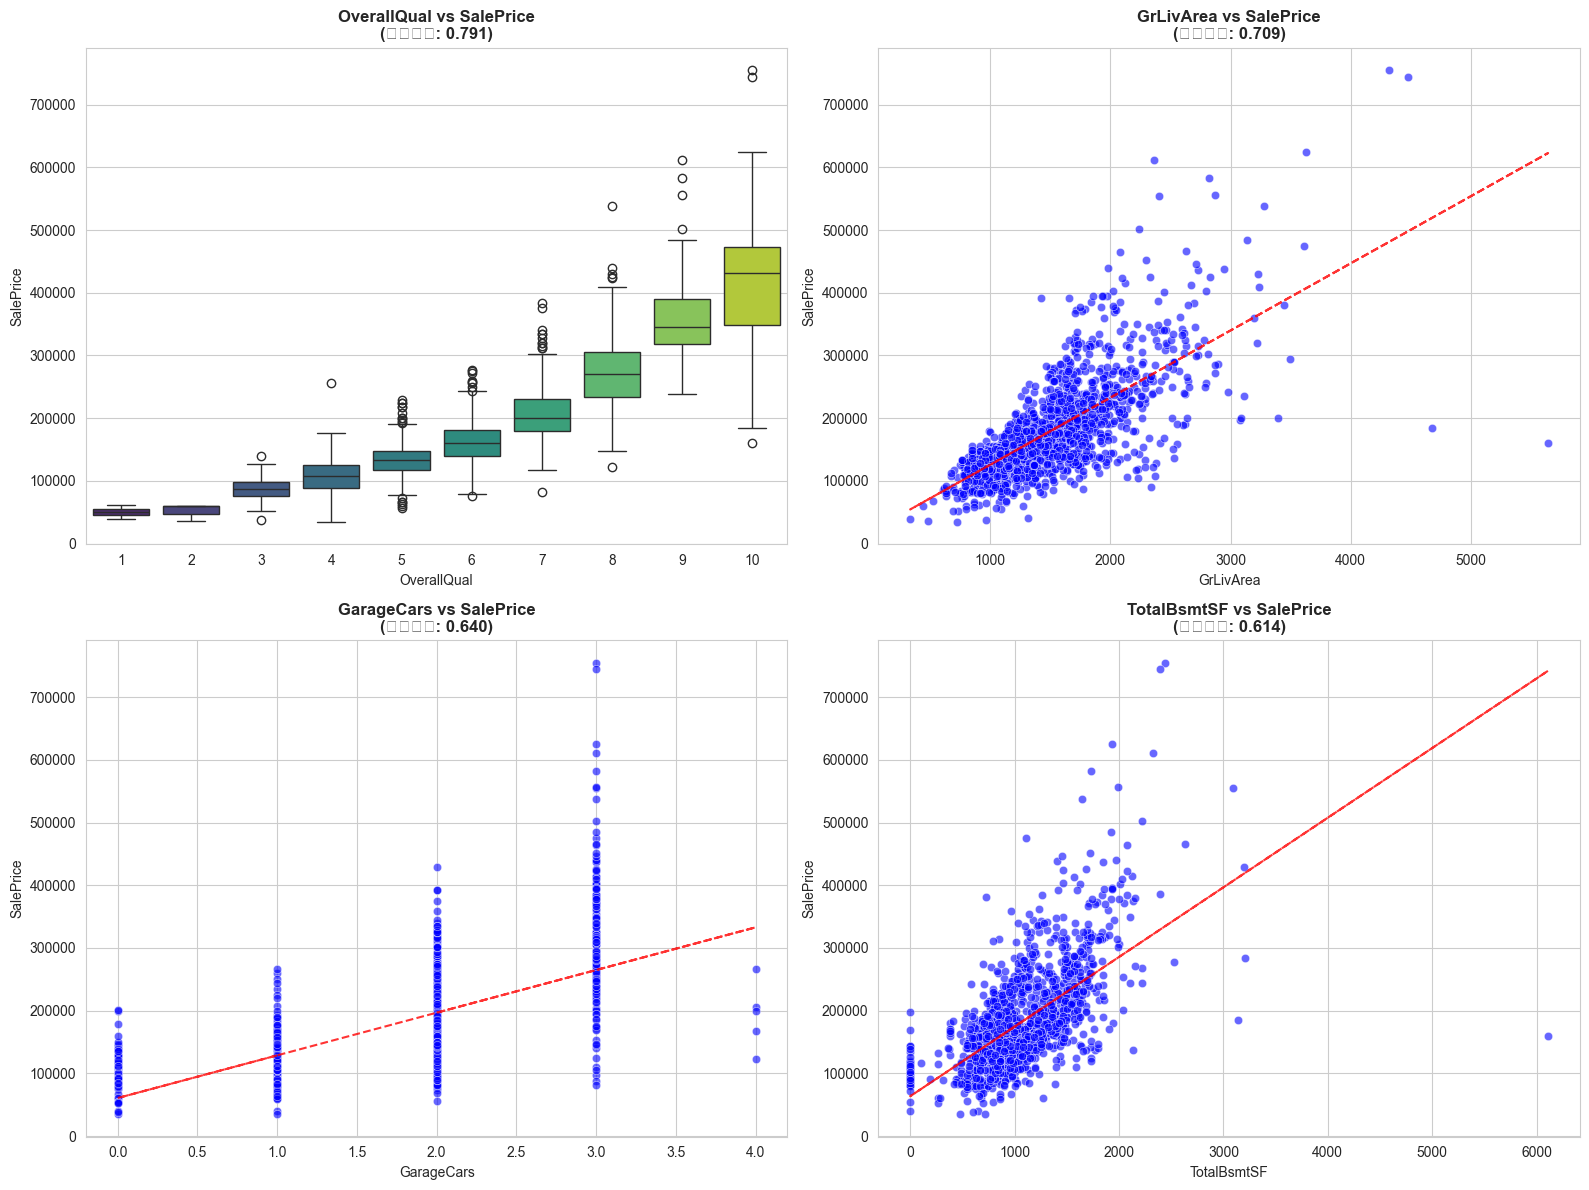


📊 重要特徵統計分析:

OverallQual:
  - 相關係數: 0.791
  - 平均值: 6.10
  - 標準差: 1.38

GrLivArea:
  - 相關係數: 0.709
  - 平均值: 1515.46
  - 標準差: 525.48
  - 與房價趨勢: 正相關

GarageCars:
  - 相關係數: 0.640
  - 平均值: 1.77
  - 標準差: 0.75
  - 與房價趨勢: 正相關

TotalBsmtSF:
  - 相關係數: 0.614
  - 平均值: 1057.43
  - 標準差: 438.71
  - 與房價趨勢: 正相關


In [8]:
# --- Cell 8: 重要特徵詳細分析 ---
print("🔍 重要特徵與房價關係深度分析")

# 選擇前4個最相關特徵
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    if feature == 'OverallQual':
        # OverallQual 是類別型數值，使用箱形圖
        sns.boxplot(data=train, x=feature, y='SalePrice', ax=axes[i], palette='viridis')
        axes[i].set_title(f'{feature} vs SalePrice\n(相關係數: {corr_with_price[feature]:.3f})', 
                         fontweight='bold')
    else:
        # 其他特徵使用散點圖
        sns.scatterplot(data=train, x=feature, y='SalePrice', ax=axes[i], alpha=0.6, color='blue')
        axes[i].set_title(f'{feature} vs SalePrice\n(相關係數: {corr_with_price[feature]:.3f})', 
                         fontweight='bold')
        
        # 添加趨勢線
        z = np.polyfit(train[feature], train['SalePrice'], 1)
        p = np.poly1d(z)
        axes[i].plot(train[feature], p(train[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# 個別特徵統計分析
print("\n📊 重要特徵統計分析:")
for feature in top_features:
    print(f"\n{feature}:")
    print(f"  - 相關係數: {corr_with_price[feature]:.3f}")
    print(f"  - 平均值: {train[feature].mean():.2f}")
    print(f"  - 標準差: {train[feature].std():.2f}")
    if feature != 'OverallQual':
        print(f"  - 與房價趨勢: { '正相關' if corr_with_price[feature] > 0 else '負相關'}")

🏘️ 重要類別特徵分析


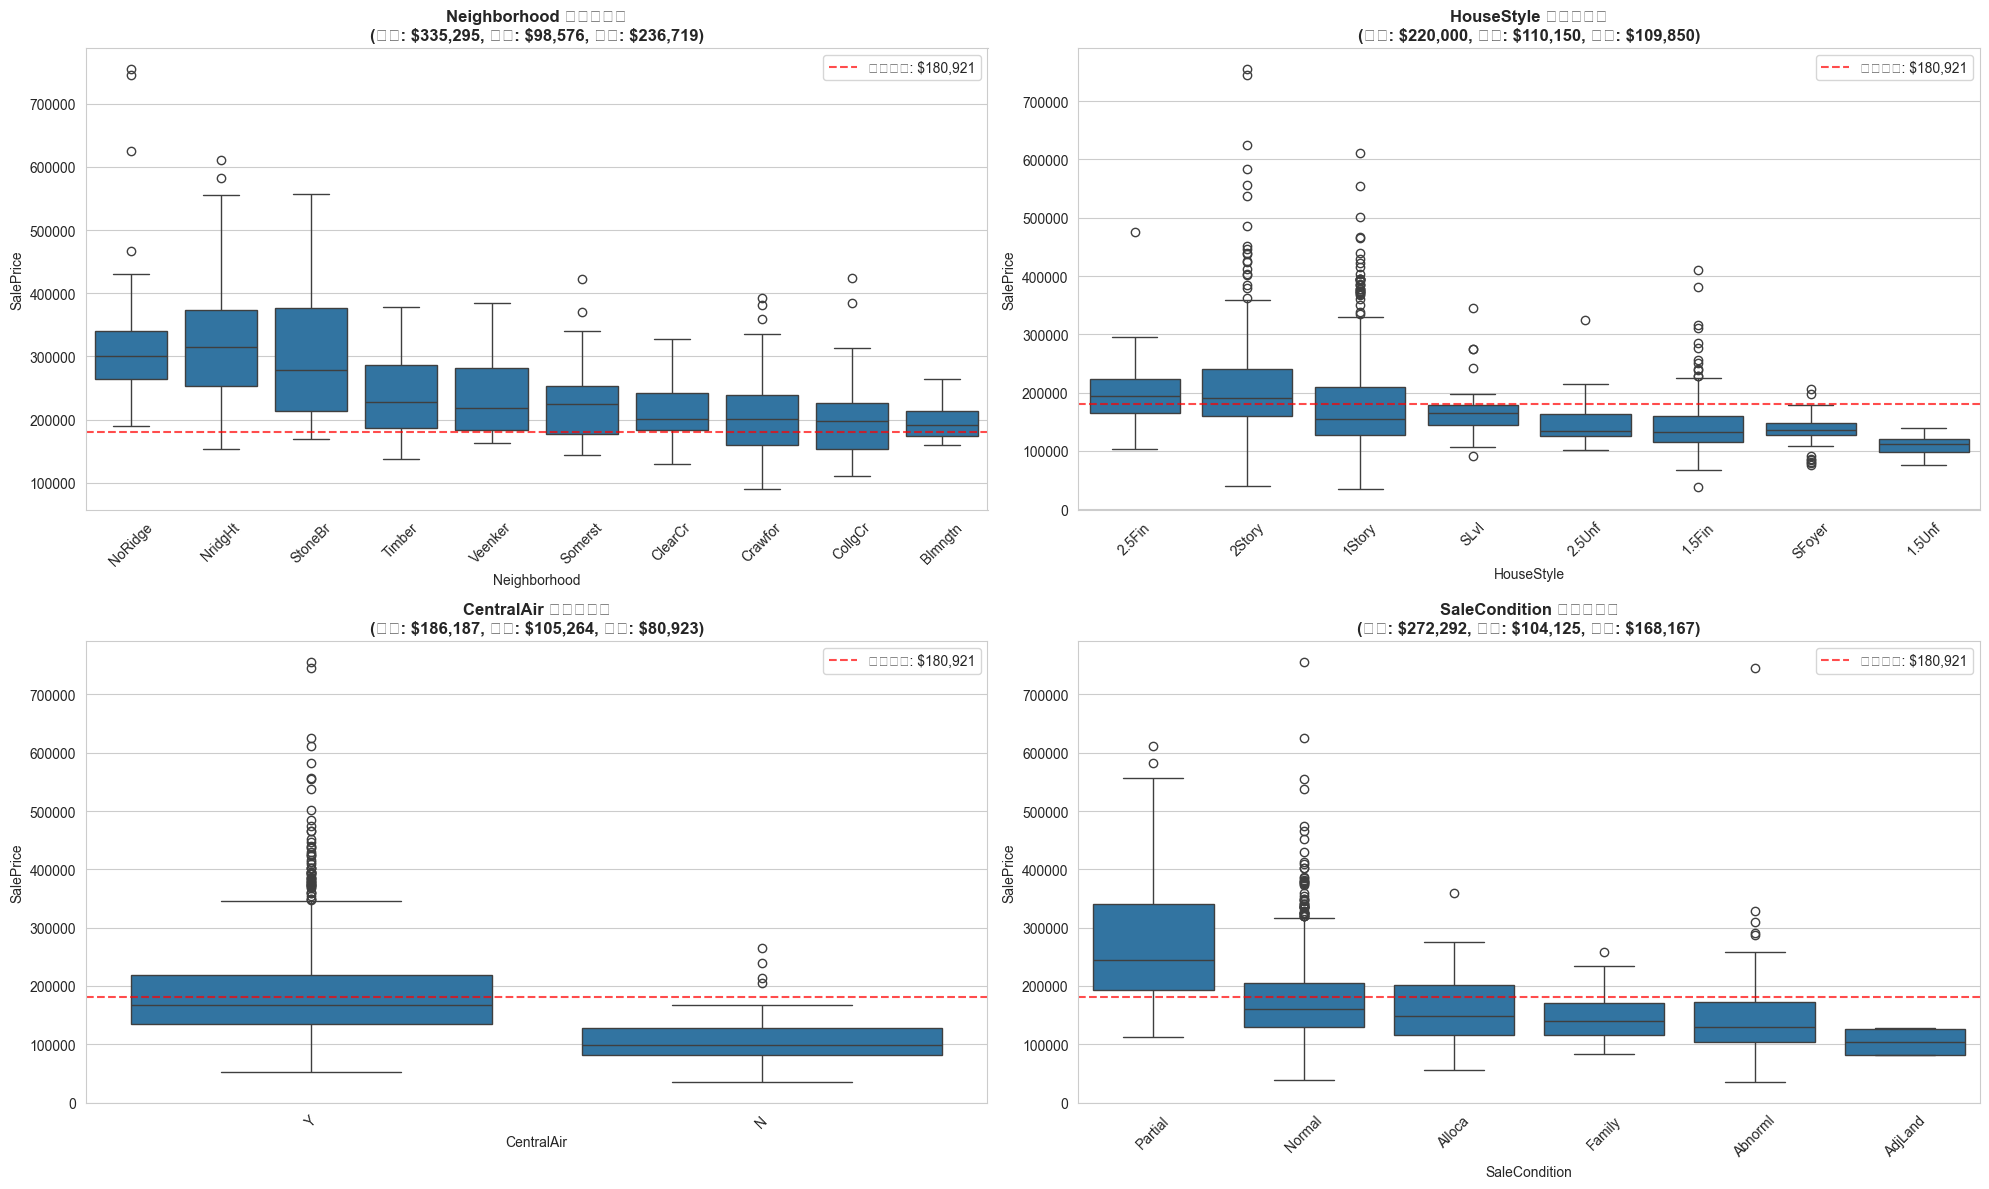

💡 類別特徵發現:
- Neighborhood: 價格範圍 $236,719 (最高: NoRidge, 最低: MeadowV)
- HouseStyle: 價格範圍 $109,850 (最高: 2.5Fin, 最低: 1.5Unf)
- CentralAir: 價格範圍 $80,923 (最高: Y, 最低: N)
- SaleCondition: 價格範圍 $168,167 (最高: Partial, 最低: AdjLand)


In [9]:
# --- Cell 9: 類別特徵分析 ---
print("🏘️ 重要類別特徵分析")

# 選擇重要的類別特徵
cat_features = ['Neighborhood', 'HouseStyle', 'CentralAir', 'SaleCondition']

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.ravel()

for i, feature in enumerate(cat_features):
    # 計算每個類別的平均房價和數量
    stats = train.groupby(feature)['SalePrice'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    
    # 選擇前10個類別（避免過度擁擠）
    top_categories = stats.head(10).index if len(stats) > 10 else stats.index
    
    plot_data = train[train[feature].isin(top_categories)]
    
    sns.boxplot(data=plot_data, x=feature, y='SalePrice', ax=axes[i], order=top_categories)
    axes[i].tick_params(axis='x', rotation=45)
    
    # 添加平均價格線
    overall_mean = train['SalePrice'].mean()
    axes[i].axhline(y=overall_mean, color='red', linestyle='--', alpha=0.7, 
                   label=f'整體平均: ${overall_mean:,.0f}')
    
    max_price = stats['mean'].max()
    min_price = stats['mean'].min()
    axes[i].set_title(f'{feature} 對房價影響\n(最高: ${max_price:,.0f}, 最低: ${min_price:,.0f}, 差異: ${max_price-min_price:,.0f})', 
                     fontweight='bold')
    axes[i].legend()

plt.tight_layout()
plt.show()

print("💡 類別特徵發現:")
for feature in cat_features:
    price_by_cat = train.groupby(feature)['SalePrice'].mean()
    price_range = price_by_cat.max() - price_by_cat.min()
    print(f"- {feature}: 價格範圍 ${price_range:,.0f} (最高: {price_by_cat.idxmax()}, 最低: {price_by_cat.idxmin()})")

🚨 離群值檢測與分析
GrLivArea 離群值數量: 31
離群值閾值: GrLivArea > 2748


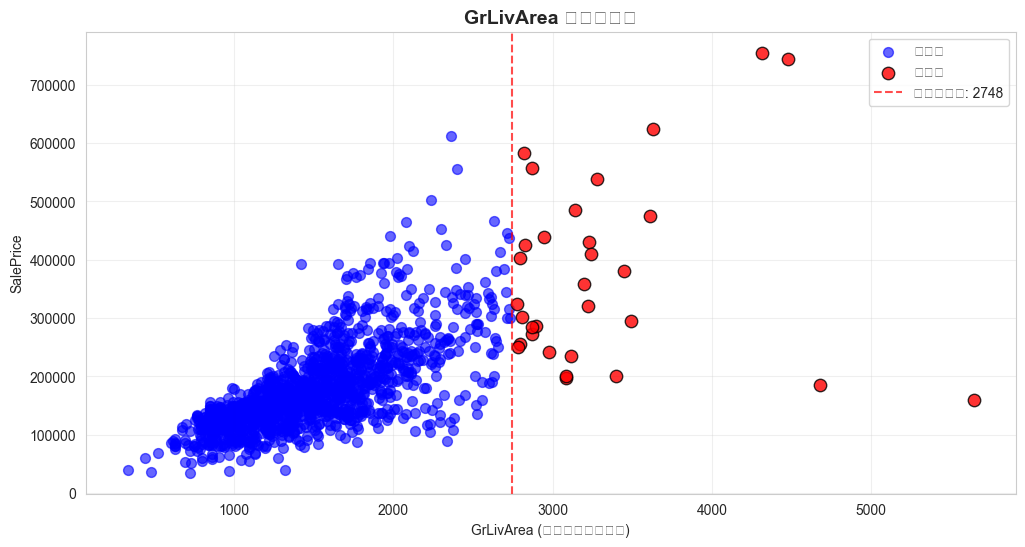


📋 發現 31 個離群值，詳細資訊:


,GrLivArea,SalePrice,Neighborhood,OverallQual,YearBuilt
1298,5642,160000,Edwards,10,2008
523,4676,184750,Edwards,10,2007
1182,4476,745000,NoRidge,10,1996
691,4316,755000,NoRidge,10,1994
1169,3627,625000,NoRidge,10,1995
185,3608,475000,OldTown,10,1892
304,3493,295000,OldTown,7,1880
1268,3447,381000,Crawfor,8,1935
635,3395,200000,SWISU,6,1914
769,3279,538000,StoneBr,8,2003



💡 離群值處理建議:
- 這些樣本的 GrLivArea 異常大但價格相對較低
- 建議在建模時考慮移除或進行特殊處理


In [10]:
# --- Cell 10: 離群值檢測 ---
print("🚨 離群值檢測與分析")

# 使用 GrLivArea 檢測離群值
Q1 = train['GrLivArea'].quantile(0.25)
Q3 = train['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = train[train['GrLivArea'] > upper_bound]
print(f"GrLivArea 離群值數量: {len(outliers)}")
print(f"離群值閾值: GrLivArea > {upper_bound:.0f}")

# 視覺化離群值
plt.figure(figsize=(12, 6))

# 散點圖標記離群值
normal_data = train[train['GrLivArea'] <= upper_bound]
outlier_data = train[train['GrLivArea'] > upper_bound]

plt.scatter(normal_data['GrLivArea'], normal_data['SalePrice'], 
           alpha=0.6, color='blue', label='正常值', s=50)
plt.scatter(outlier_data['GrLivArea'], outlier_data['SalePrice'], 
           alpha=0.8, color='red', label='離群值', s=80, edgecolors='black')

plt.axvline(x=upper_bound, color='red', linestyle='--', alpha=0.7, 
           label=f'離群值閾值: {upper_bound:.0f}')
plt.xlabel('GrLivArea (地面以上居住面積)')
plt.ylabel('SalePrice')
plt.title('GrLivArea 離群值檢測', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 顯示離群值詳細資訊
if len(outliers) > 0:
    print(f"\n📋 發現 {len(outliers)} 個離群值，詳細資訊:")
    outlier_details = outliers[['GrLivArea', 'SalePrice', 'Neighborhood', 'OverallQual', 'YearBuilt']]
    display(outlier_details.sort_values('GrLivArea', ascending=False))
    
    print(f"\n💡 離群值處理建議:")
    print("- 這些樣本的 GrLivArea 異常大但價格相對較低")
    print("- 建議在建模時考慮移除或進行特殊處理")

🔥 特徵間相關性熱力圖分析


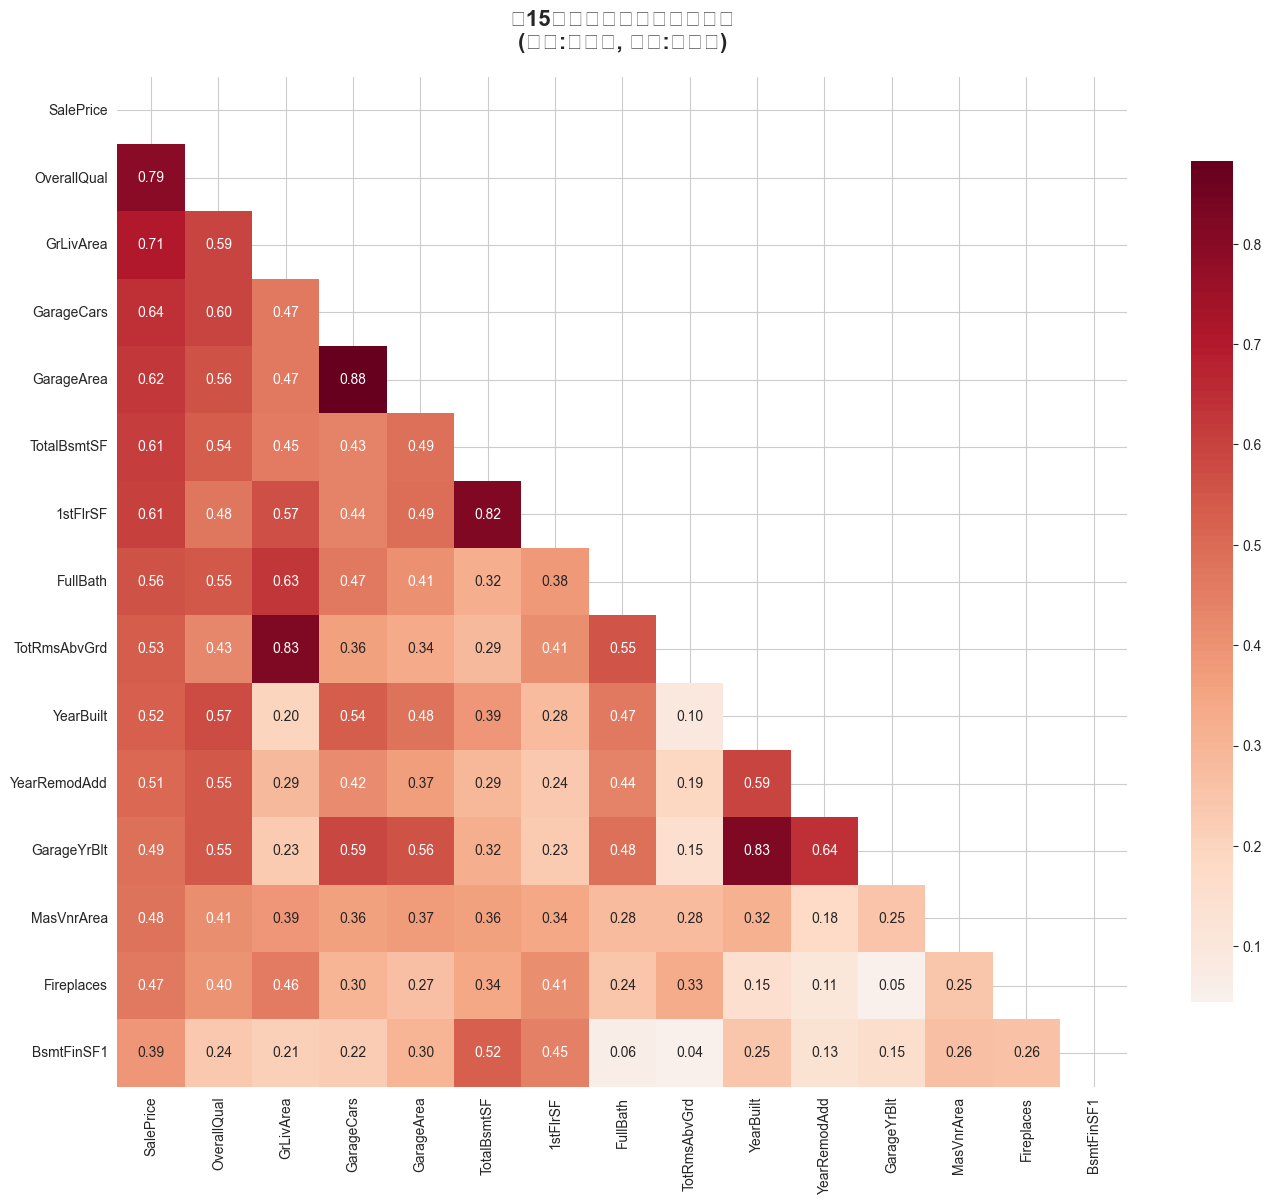

🔍 高度相關的特徵對 (相關係數 > 0.7):
  • GarageCars - GarageArea: 0.882 (正相關)
  • YearBuilt - GarageYrBlt: 0.826 (正相關)
  • GrLivArea - TotRmsAbvGrd: 0.825 (正相關)
  • TotalBsmtSF - 1stFlrSF: 0.820 (正相關)
  • SalePrice - OverallQual: 0.791 (正相關)
  • SalePrice - GrLivArea: 0.709 (正相關)

💡 多重共線性處理建議:
- GarageCars 和 GarageArea 高度相關，可考慮只保留一個
- TotalBsmtSF 和 1stFlrSF 相關性高，反映相似的建築特徵


In [11]:
# --- Cell 11: 特徵間相關性熱力圖 ---
print("🔥 特徵間相關性熱力圖分析")

# 選擇前15個最相關特徵
top_corr_features = corr_with_price.head(15).index
corr_matrix = train[top_corr_features].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # 隱藏上三角

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, cbar_kws={"shrink": .8}, 
            annot_kws={"size": 10})

plt.title('前15個重要特徵相關性熱力圖\n(紅色:正相關, 藍色:負相關)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 檢查高度相關的特徵對
print("🔍 高度相關的特徵對 (相關係數 > 0.7):")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7 and corr_matrix.columns[i] != corr_matrix.columns[j]:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_val
            ))

# 顯示高度相關的特徵對
if high_corr_pairs:
    for feat1, feat2, corr_val in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        relation = "正相關" if corr_val > 0 else "負相關"
        print(f"  • {feat1} - {feat2}: {corr_val:.3f} ({relation})")
else:
    print("  • 無高度相關的特徵對")

print("\n💡 多重共線性處理建議:")
print("- GarageCars 和 GarageArea 高度相關，可考慮只保留一個")
print("- TotalBsmtSF 和 1stFlrSF 相關性高，反映相似的建築特徵")

In [12]:
# --- Cell 12: EDA 總結報告 ---
print("=" * 60)
print("📋 EDA 探索性分析總結報告")
print("=" * 60)

# 建立總結資料
summary_findings = {
    "📊 資料基本資訊": [
        f"訓練集: {train.shape[0]:,} 筆資料, {train.shape[1]} 個特徵",
        f"測試集: {test.shape[0]:,} 筆資料, {test.shape[1]} 個特徵",
        f"目標變數: SalePrice (房價)",
        f"數值特徵: {len(train.select_dtypes(include=[np.number]).columns)} 個",
        f"類別特徵: {len(train.select_dtypes(include=['object']).columns)} 個"
    ],
    
    "🚨 資料品質問題": [
        f"缺失值欄位: {len(missing_df)} 個",
        f"嚴重缺失欄位(>50%): {len(missing_df[missing_df['缺失比例%'] > 50])} 個",
        f"離群值: {len(outliers)} 個 (GrLivArea)",
        f"目標變數偏態: {train['SalePrice'].skew():.2f} (嚴重右偏)"
    ],
    
    "🎯 重要特徵發現": [
        f"最相關特徵: {corr_with_price.index[1]} ({corr_with_price.iloc[1]:.3f})",
        f"強相關特徵(>0.5): {len(corr_with_price[corr_with_price > 0.5])} 個",
        f"高度相關特徵對: {len(high_corr_pairs)} 對",
        "關鍵特徵: OverallQual, GrLivArea, GarageCars, TotalBsmtSF"
    ],
    
    "💡 特徵工程建議": [
        "對數轉換: SalePrice, GrLivArea, LotArea 等右偏特徵",
        "缺失值處理: 填補數值特徵, 'None'標記類別特徵",
        "類別編碼: One-hot encoding 或 Label encoding",
        "新建特徵: 房屋年齡, 總面積, 房間比率等",
        "離群值處理: 移除或修正極端樣本"
    ],
    
    "📈 建模方向建議": [
        "使用樹狀模型: Random Forest, XGBoost, LightGBM",
        "考慮線性模型 + 特徵正規化",
        "交叉驗證避免過度擬合",
        "特徵選擇去除多重共線性"
    ]
}

# 輸出總結報告
for category, items in summary_findings.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  • {item}")

print("\n" + "=" * 60)
print("🎉 EDA 分析完成！下一步: 特徵工程與模型建立")
print("=" * 60)

📋 EDA 探索性分析總結報告

📊 資料基本資訊:
  • 訓練集: 1,460 筆資料, 81 個特徵
  • 測試集: 1,459 筆資料, 80 個特徵
  • 目標變數: SalePrice (房價)
  • 數值特徵: 38 個
  • 類別特徵: 43 個

🚨 資料品質問題:
  • 缺失值欄位: 19 個
  • 嚴重缺失欄位(>50%): 5 個
  • 離群值: 31 個 (GrLivArea)
  • 目標變數偏態: 1.88 (嚴重右偏)

🎯 重要特徵發現:
  • 最相關特徵: OverallQual (0.791)
  • 強相關特徵(>0.5): 11 個
  • 高度相關特徵對: 6 對
  • 關鍵特徵: OverallQual, GrLivArea, GarageCars, TotalBsmtSF

💡 特徵工程建議:
  • 對數轉換: SalePrice, GrLivArea, LotArea 等右偏特徵
  • 缺失值處理: 填補數值特徵, 'None'標記類別特徵
  • 類別編碼: One-hot encoding 或 Label encoding
  • 新建特徵: 房屋年齡, 總面積, 房間比率等
  • 離群值處理: 移除或修正極端樣本

📈 建模方向建議:
  • 使用樹狀模型: Random Forest, XGBoost, LightGBM
  • 考慮線性模型 + 特徵正規化
  • 交叉驗證避免過度擬合
  • 特徵選擇去除多重共線性

🎉 EDA 分析完成！下一步: 特徵工程與模型建立


In [14]:
# --- Cell 13: 資料匯出與儲存 ---
print("💾 分析結果儲存")

# 儲存相關性表格
corr_df.to_csv('../reports/top_correlations.csv', index=False, encoding='utf-8-sig')

# 儲存缺失值報告
missing_df.to_csv('../reports/missing_value_report.csv', index=True, encoding='utf-8-sig')

print("✅ 以下檔案已儲存:")
print("  - ../reports/top_correlations.csv (特徵相關性)")
print("  - ../reports/missing_value_report.csv (缺失值報告)")

print(f"\n📊 主要圖表已生成並顯示")
print("🎯 EDA 階段完成，可進行特徵工程")

💾 分析結果儲存
✅ 以下檔案已儲存:
  - ../reports/top_correlations.csv (特徵相關性)
  - ../reports/missing_value_report.csv (缺失值報告)

📊 主要圖表已生成並顯示
🎯 EDA 階段完成，可進行特徵工程
